# GitHub Search API

The official API documentation can be found on this page:

https://docs.github.com/en/rest/reference/search#search-repositories

The most beautiful thing is that we don’t need to register or apply for an API key to use this endpoint. Of course, it has a rate limit which is up to 10 requests per minute, but it is not a problem for us as we just want to get several top-ranked repos. A few times of API calls will be enough for us to debug.

In [1]:
! pip install requests

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import requests
import pandas as pd

The API endpoint is https://api.github.com/search/repositories based on the API documentation. Since we are only interested in Python-based projects, we need to put the argument language:python in the query. It seems that the API behavior has changed slightly over the last year. That is, it has to take at least one search term (string) in the query. Otherwise, the results are unpredictable. Therefore, let’s put “python” as the only term in the query. The rationality is that, if the repo is regarding Python, it should mention “python” in the Readme.md or use it as a tag of the repo anyway.

Then, we want to sort the search results by the number of stars and order by descent. That means our search string is as follows.

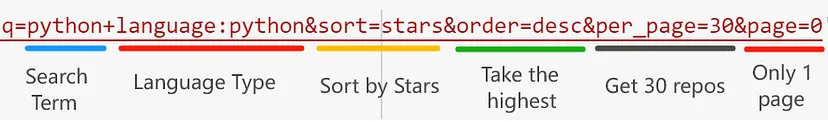

The full URL for this GET request is as follows.

In [3]:
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars&order=desc'

Then, we can use the requests module to call this API endpoint. We should use the GET method. Then, we can convert the results to a Python dictionary.

In [4]:
res = requests.get(url)
res_dict = res.json()

All the search results will be in an array with the key “items”. So, we can get all the repo information as follows.

Now, let’s get all the “items” from the search result into an array repos.

In [5]:
repos = res_dict['items']
len(repos)

30

There is some other information in the result dictionary. If we remove the item array, the only two keys left are total_count and incomplete_results. The former indicates how many repos retrieved with our query. As shown in the screenshot below, there are a total of 2,219,756 of them. That is not surprising at all, since we are searching for all Python repos in GitHub.

In [6]:
del res_dict['items']
res_dict

{'total_count': 10940144, 'incomplete_results': True}

The incomplete_results indicates that there are more repos and this JSON payload is just a page.

Now, let’s convert the items array into Pandas dataframe.

In [7]:
repo_df = pd.DataFrame(repos)

Then, I want to remove all the columns that are not interested in our context, since we only want to know the name of the repo and the number of stars. I’ll also add one more column called year_on_github to catch how many years this project has been created on GitHub.

In [8]:
repo_df = repo_df[['name', 'full_name', 'html_url', 'created_at', 'stargazers_count', 'watchers', 'forks', 'open_issues']]
repo_df['created_at'] = pd.to_datetime(repo_df['created_at'])
repo_df['created_year'] = repo_df['created_at'].dt.year
repo_df['years_on_github'] = 2023 - repo_df['created_at'].dt.year

Here is the full list of the Top 30 Repos:

In [9]:
repo_df

,name,full_name,html_url,created_at,stargazers_count,watchers,forks,open_issues,created_year,years_on_github
0,core,home-assistant/core,https://github.com/home-assistant/core,2013-09-17 07:29:48+00:00,66085,66085,26823,2933,2013,10
1,funNLP,fighting41love/funNLP,https://github.com/fighting41love/funNLP,2018-08-21 11:20:39+00:00,61082,61082,13892,23,2018,5
2,you-get,soimort/you-get,https://github.com/soimort/you-get,2012-08-20 15:53:36+00:00,48826,48826,9404,385,2012,11
3,diagrams,mingrammer/diagrams,https://github.com/mingrammer/diagrams,2020-02-02 15:23:24+00:00,33219,33219,2167,350,2020,3
4,12306,testerSunshine/12306,https://github.com/testerSunshine/12306,2017-05-17 12:23:40+00:00,33167,33167,9788,282,2017,6
5,ComfyUI,comfyanonymous/ComfyUI,https://github.com/comfyanonymous/ComfyUI,2023-01-17 03:15:56+00:00,22999,22999,2433,1136,2023,0
6,Langchain-Chatchat,chatchat-space/Langchain-Chatchat,https://github.com/chatchat-space/Langchain-Ch...,2023-03-31 12:12:45+00:00,21460,21460,3698,7,2023,0
7,tornado,tornadoweb/tornado,https://github.com/tornadoweb/tornado,2009-09-09 04:55:16+00:00,21400,21400,5576,220,2009,14
8,Gooey,chriskiehl/Gooey,https://github.com/chriskiehl/Gooey,2014-01-01 21:06:05+00:00,20095,20095,1090,159,2014,9
9,datasets,huggingface/datasets,https://github.com/huggingface/datasets,2020-03-26 09:23:22+00:00,17908,17908,2450,664,2020,3
